In [29]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 16.0)
plt.rcParams['image.interpolation'] = 'nearest'


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
#visualize
# raw_out_path='/home/jy/results/new/raw'
# img_path='/home/jy/dataset/fabric_dataset/out'
# query_out_path='/home/jy/results/'
raw_out_path = '/home/jy/results/ox/raw'
import cv2
from cbir.utils import get_list, load_npy_files
from cbir.pwa import get_discriminative_fm


t_start = time.time()
raw_features_list = get_list(raw_out_path, 'npy')
raw_features, raw_names = load_npy_files(raw_features_list)
print('load time %f s' % (time.time() - t_start,))
print(raw_features.shape)
# t_start = time.time()
# raw_features_list = get_list(raw_out_path, 'npy')
# raw_features, raw_names = load_npy_files(raw_features_list)
# print('load time %f s' % (time.time() - t_start,))
# print(raw_features.shape)

successful loading of npy file !!!
load time 11.003314 s
(5063, 16, 16, 512)


from cbir.pwa import get_discriminative_fm
test_path = '/home/jy/src/pwa/data/feature/paris_dataset_feature'
test = np.load('/home/jy/src/pwa/data/filter_select/select_num_paris.npy')
#test_list = get_list(test_path,'npy')
#test_features, names = load_npy_files(test_list)

sum_matrix=np.zeros((0,512))
print(sum_matrix.shape)
directorys= os.listdir(test_path)
for directory in directorys:
    feature_map= np.load(os.path.join(test_path,directory))
    sumt=(feature_map.sum(1)).sum(1).reshape(1,-1)
    # sum_matix.append(sum)
    if len(sum_matrix) == 0:
        sum_matrix=sumt
        print(sum_matrix.shape)
    else:
        pass
        #print(sum_matrix.shape)
        sum_matrix=np.vstack([sum_matrix, sumt])
    #print(directory)


In [68]:
r_s=3100
print(raw_names[r_s:r_s+100])

['oxford_000543', 'oxford_000545', 'oxford_000546', 'oxford_000556', 'oxford_000558', 'oxford_000560', 'oxford_000562', 'oxford_000563', 'oxford_000565', 'oxford_000567', 'oxford_000568', 'oxford_000569', 'oxford_000570', 'oxford_000573', 'oxford_000574', 'oxford_000575', 'oxford_000579', 'oxford_000580', 'oxford_000581', 'oxford_000582', 'oxford_000583', 'oxford_000584', 'oxford_000585', 'oxford_000586', 'oxford_000587', 'oxford_000588', 'oxford_000589', 'oxford_000590', 'oxford_000592', 'oxford_000599', 'oxford_000601', 'oxford_000605', 'oxford_000607', 'oxford_000609', 'oxford_000610', 'oxford_000620', 'oxford_000623', 'oxford_000624', 'oxford_000626', 'oxford_000627', 'oxford_000633', 'oxford_000635', 'oxford_000636', 'oxford_000637', 'oxford_000638', 'oxford_000646', 'oxford_000655', 'oxford_000656', 'oxford_000657', 'oxford_000658', 'oxford_000659', 'oxford_000669', 'oxford_000672', 'oxford_000673', 'oxford_000676', 'oxford_000677', 'oxford_000679', 'oxford_000681', 'oxford_00068

(1024, 768, 3)
oxford_000736


(-0.5, 767.5, 1023.5, -0.5)

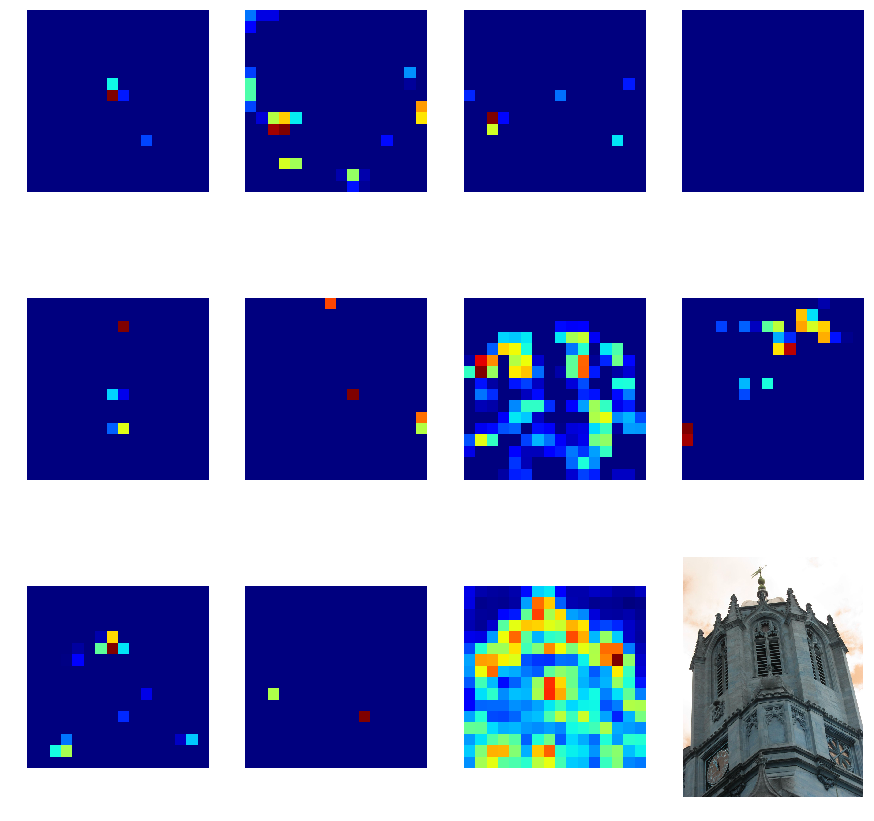

In [77]:
indx = 3186
i_x,i_y = 3,4
i_s =380
img_path = "/home/jy/dataset/oxbuild"
test_img = cv2.imread(os.path.join(img_path,raw_names[indx]+'.jpg'))
print(test_img.shape)
print(raw_names[indx])
fig = plt.figure(1,figsize=(15,15))
plt.axis('off')
tmp_feature = raw_features[indx]
for i, f in enumerate(range(i_s,i_s+10)):
    plt.subplot(i_x,i_y,i+1)
    plt.axis('off')
    plt.imshow(tmp_feature[...,f], cmap='jet')
# show_list=[3,13,15]
# for i, f in enumerate(show_list):
#     plt.subplot(3,4,i+1)
#     plt.axis('off')
#     print(i,f)
#     plt.imshow(tmp_feature[...,f], cmap='jet')
plt.subplot(3,4,11).imshow(raw_features[indx].sum(-1), cmap='jet')
plt.axis('off')
plt.subplot(3,4,12).imshow(test_img)
plt.axis('off')


In [3]:
indxs = get_discriminative_fm(raw_features)
print(indxs.shape)

(512,)


(1280, 960, 3)
(16, 16, 512)
1B0105D13A1B_0_1219


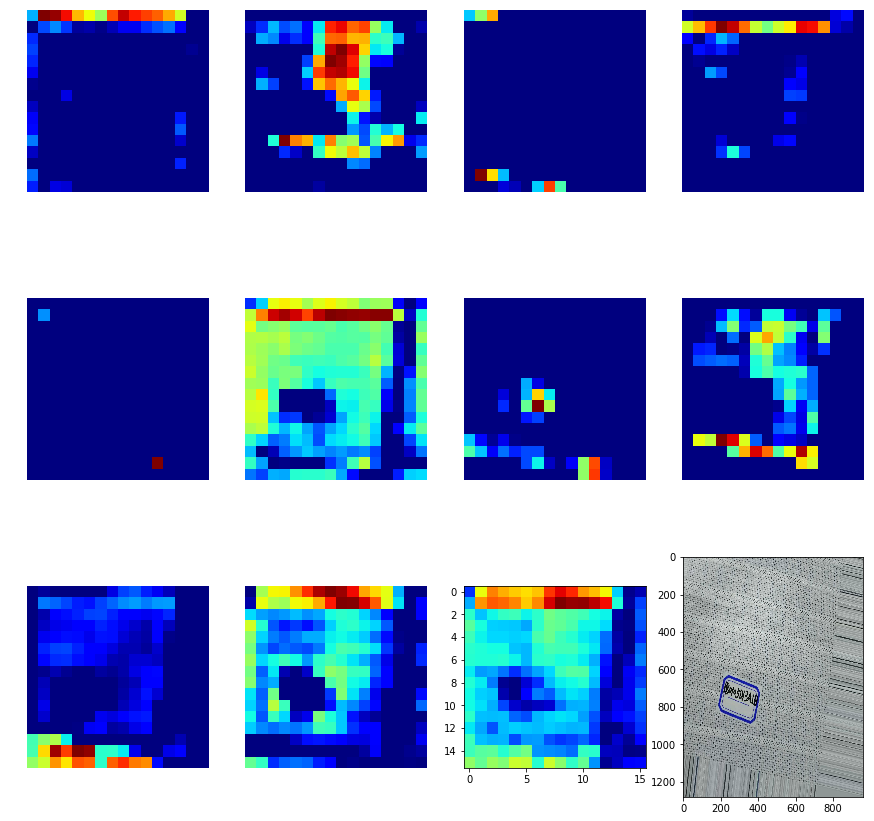

In [4]:


indx = 300
indx2 = 3
test_img = cv2.imread(os.path.join(img_path,raw_names[indx]+'.jpg'))
print(test_img.shape)
fig = plt.figure(1,figsize=(15,15))
plt.axis('off')
#plt.imshow(test_img[...,::-1],alpha=0.6)
#for i in range(indx2):
    #tmp = plt.subplot()
print(raw_features[0].shape)
print(raw_names[indx])
tmp = raw_features[indx][...,indxs[indx2]]
#tmp = np.sum(tmp,axis=-1)
#print(tmp.shape)
#plt.imshow(tmp, cmap='jet', alpha=0.8)
tmp_feature = raw_features[indx]
for i, f in enumerate(indxs[:10]):
    plt.subplot(3,4,i+1)
    plt.axis('off')
    plt.imshow(tmp_feature[...,f], cmap='jet')

plt.subplot(3,4,11).imshow(raw_features[indx][...,indxs[:10]].sum(-1), cmap='jet')
plt.subplot(3,4,12).imshow(test_img)
#print(tmp_feature[...,1])


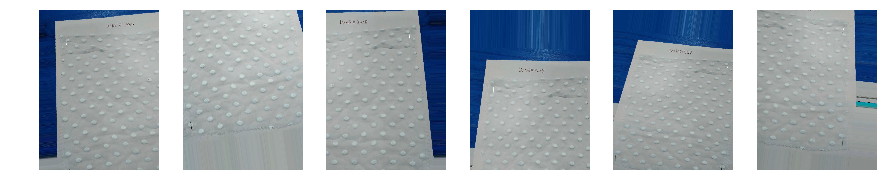

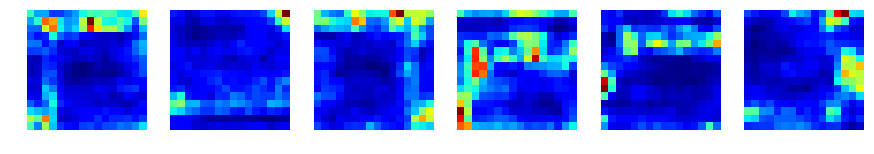

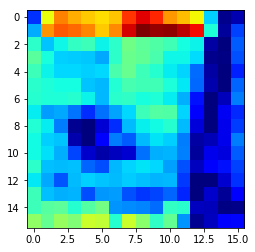

In [5]:
fig = plt.figure(2,figsize=(15,15))

for i in range(6):
    tmp=cv2.imread(os.path.join(img_path,raw_names[i]+'.jpg'))
    plt.subplot(1,6,(i+1))
    plt.imshow(tmp)
    plt.axis('off')
    
fig = plt.figure(3,figsize=(15,15))
for i in range(6):
    plt.subplot(1,6,(i+1))
    plt.axis('off')
    plt.imshow(raw_features[i].sum(-1),cmap='jet')
    
plt.figure(4)
plt.imshow(raw_features[indx][...,indxs[:10]].sum(-1),cmap='jet')

(24, 32) float32
(24, 32) int64


/home/jy/.pyenv/versions/3.5.4/envs/final/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


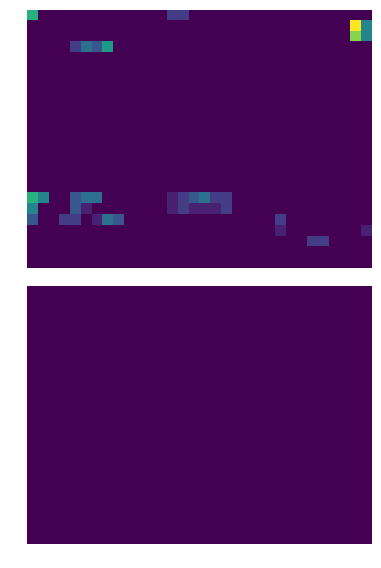

In [112]:
a=np.load('/home/jy/src/pwa/data/feature/oxford_dataset_feature/oxford_001193.npy')
b=a[356]
#plt.imshow(cv2.resize(b,(1024,768)), cmap='jet', alpha=0.8)
#plt.imshow(b, cmap='jet', alpha=0.8)
print(b.shape,b.dtype)

from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt


img = np.asarray(b,dtype='int')
print(img.shape,img.dtype)
labels1 = segmentation.slic(img, compactness=30, n_segments=400)
out1 = color.label2rgb(labels1, img, kind='avg')

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg')

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

In [34]:
#DDT

from cbir.ddt import ddt,ddt2

tmp = raw_features[:6]
#print(tmp.shape)
ddt_tmp = ddt(tmp)
print(ddt_tmp)
#inds = np.argsort(ddt_tmp)
#print(inds[::-1])
ddt2_tmp = ddt2(tmp)

(1, 512)
(6, 16, 16, 512)
(6, 512)
(6, 6)
[[ 14795.77929688  -7839.78027344   3893.69506836  -5378.47753906
   -3569.27368164  -1901.89038086]
 [ -7839.78027344  53315.265625    -9760.421875   -19649.65625
   -8044.22265625  -8021.35058594]
 [  3893.69506836  -9760.421875    27826.703125    -6434.28027344
  -11711.91992188  -3813.72167969]
 [ -5378.47753906 -19649.65625     -6434.28027344  29436.234375
    7170.14599609  -5143.97363281]
 [ -3569.27368164  -8044.22265625 -11711.91992188   7170.14599609
   17835.65429688  -1680.36755371]
 [ -1901.89038086  -8021.35058594  -3813.72167969  -5143.97363281
   -1680.36755371  20561.3359375 ]]
[[ 2.00925883  2.24902261  1.88781757  1.70284073  1.85215492  1.71640765]
 [ 2.24902261  3.12916283  2.19701643  2.00752289  2.23086024  2.08271515]
 [ 1.88781757  2.19701643  2.02851982  1.65145198  1.75118843  1.6621465 ]
 [ 1.70284073  2.00752289  1.65145198  1.81021758  1.78127235  1.53748255]
 [ 1.85215492  2.23086024  1.75118843  1.78127235  1.998

16 16 512
(256,)


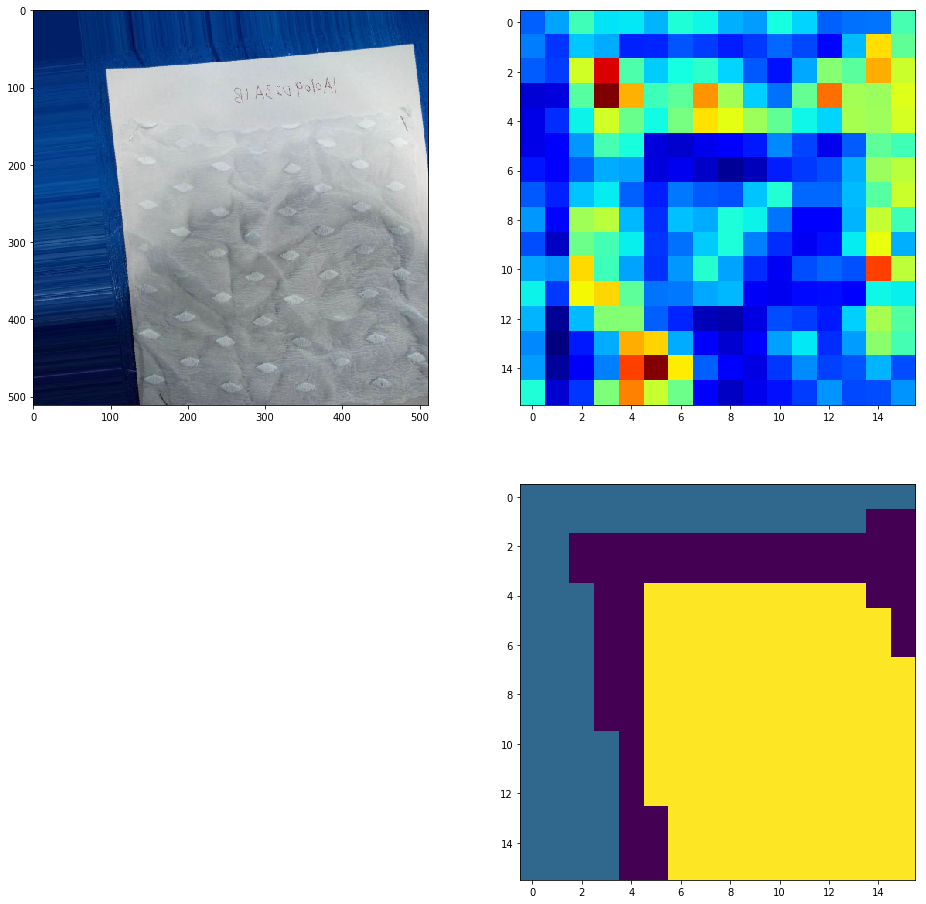

In [79]:


#kmeans
indx = 20
n_clus = 3
from sklearn.cluster import *
tmp = raw_features[indx]
H, W, C = tmp.shape
print(H,W,C)
tmp = tmp.reshape(-1,C)
#kmeans = KMeans(n_clusters=10, random_state=0).fit(tmp)
kmeans = AgglomerativeClustering(n_clusters=n_clus).fit(tmp)
#print(kmeans.labels_)
labels = kmeans.labels_.reshape(H, W)
plt.figure(10)

X = tmp.sum(-1).reshape(H,W)

labels = kmeans.labels_
#cluster_centers = kmeans.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

#print(labels == 1)
show_tmp = np.zeros_like(X.reshape(-1))
for i in labels_unique:
    show_tmp[labels == i] = 2**i
from itertools import cycle
print(show_tmp.shape)

plt.subplot(2,2,1).imshow(cv2.resize(cv2.imread(os.path.join(img_path,raw_names[indx]+'.jpg')),(512,512)))
plt.subplot(2,2,2).imshow(X,cmap='jet')
#plt.subplot(2,2,3).imshow(cluster_centers.reshape(H, W, -1).sum(-1),cmap='jet')
plt.subplot(2,2,4).imshow(show_tmp.reshape(H, W))

(16, 16, 512)
(16, 16)


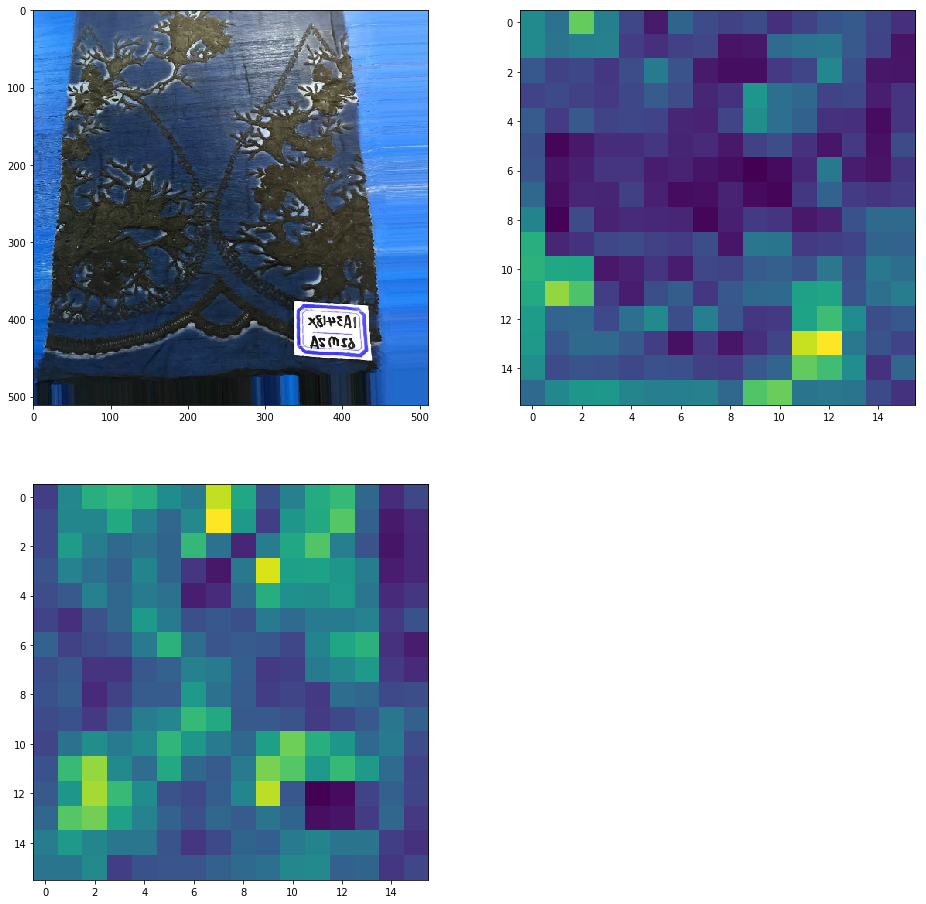

In [94]:

#mask
indx = 222

tmp = raw_features[indx]  #16 x 16 x 512
H, W, C = tmp.shape
tmp_max = tmp.max(-1)
tmp_median = tmp - np.median(tmp, axis=-1).reshape(H,W,1) > 0
print(tmp_median.shape)
tmp_sum = tmp_median.sum(-1)
print(tmp_sum.shape)
plt.figure(5)
plt.subplot(2,2,1).imshow(cv2.resize(cv2.imread(os.path.join(img_path,raw_names[indx]+'.jpg')),(512,512)))
plt.subplot(2,2,2).imshow(tmp_max)
plt.subplot(2,2,3).imshow(tmp_sum)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
(40, 256)


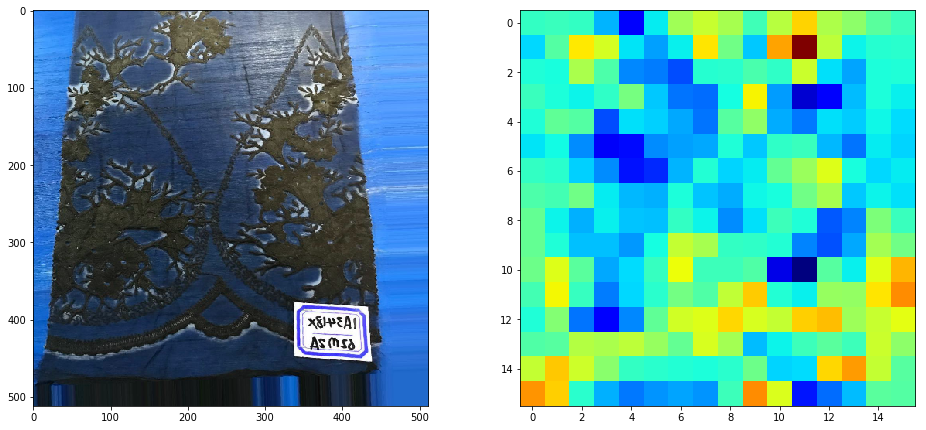

In [106]:
#pca
indx = 222
pca_dims=40
tmp = raw_features[indx]  #16 x 16 x 512
H, W, C = tmp.shape

from sklearn.decomposition import PCA
pca = PCA(n_components=pca_dims)
pca.fit(tmp.reshape(H*W,C).transpose(-1,-2))
print(pca)
print(pca.components_.shape)
plt.subplot(2,2,1).imshow(cv2.resize(cv2.imread(os.path.join(img_path,raw_names[indx]+'.jpg')),(512,512)))
plt.subplot(2,2,2).imshow(pca.components_.transpose(-1,-2).reshape(H,W,pca_dims).sum(-1),cmap='jet')
